In [1]:
import pandas as pd
import numpy as np

# For performing t-test
from scipy import stats

# For (relatively) easy animated plots
# !pip install plotly
import plotly.graph_objects as go
import plotly.express as px

# For typical plotting
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# load in data
PATH = "data/ab_edited.csv"

df = pd.read_csv(PATH)

<IPython.core.display.Javascript object>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


<IPython.core.display.Javascript object>

In [5]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


<IPython.core.display.Javascript object>

In [6]:
df["timestamp"] = pd.DatetimeIndex(df["timestamp"]).date

<IPython.core.display.Javascript object>

In [7]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21,control,old_page,0
1,804228,2017-01-12,control,old_page,0
2,661590,2017-01-11,treatment,new_page,0
3,853541,2017-01-08,treatment,new_page,0
4,864975,2017-01-21,control,old_page,1


<IPython.core.display.Javascript object>

In [11]:
test = df[df["group"] == "treatment"]
control = df[df["group"] == "control"]

<IPython.core.display.Javascript object>

In [15]:
print(test.shape)
print(control.shape)

(145311, 5)
(145274, 5)


<IPython.core.display.Javascript object>

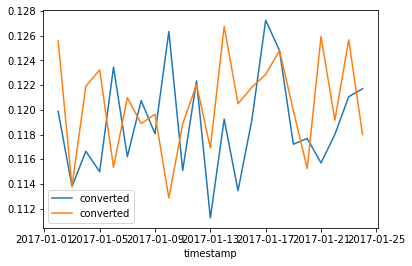

<IPython.core.display.Javascript object>

In [19]:
fig = test[["timestamp", "converted"]].groupby("timestamp").mean().plot()
control[["timestamp", "converted"]].groupby("timestamp").mean().plot(ax=fig)

In [20]:
stats.ttest_ind(test.converted, control.converted)

Ttest_indResult(statistic=-1.3116069027036805, pvalue=0.18965383906859376)

<IPython.core.display.Javascript object>